MLPClassifier example 

In [20]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Load in the file Dataset_spine.csv

- Use Pandas
- Drop the column Unnamed: 13

Always inspect the dataframe using .head()

In [12]:
# laod in the data
df = pd.read_csv("Dataset_spine.csv")
df.head()




,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Also drop ['Col7','Col8','Col9','Col10','Col11','Col12']

In [14]:
# drop col 7 - 12
df = df.drop(df.columns[7:13], axis=1)
df.head()


,Col1,Col2,Col3,Col4,Col5,Col6,Col7
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360


This will show the classes, obviously that column will be our y, the rest will be X

In [18]:
df = pd.read_csv("Dataset_spine.csv", skipinitialspace=True)
print(df.columns)
df["Class_att"].unique()

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')


array(['Abnormal', 'Normal'], dtype=object)

Binary Classifier

import the things we need from sklearn.neural_network import MLPClassifier

train_test_split
confusion_matrix

In [22]:
# your code here 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X = df.drop("Class_att", axis=1)
y = df["Class_att"]

Set the variables X and y by picking the columns as discussed above

Do a train_test_split, use a fixed random_state and make the test_size be 25%

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Now lets use MLPClassifier from sklearn

Do for 3 hidden layers with 100 units in each

set tol=0.000000001

use solver 'sgd'

In [24]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns
x_train_numeric = x_train[numeric_columns]

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Scale the numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric)
x_test_scaled = scaler.transform(x_test[numeric_columns])


# Print shapes to verify
print("x_train_scaled shape:", x_train_scaled.shape)
print("y_train_encoded shape:", y_train_encoded.shape)


x_train_scaled shape: (232, 12)
y_train_encoded shape: (232,)


fit the classifier using training

In [40]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),  # 3 hidden layers with 100 units each
    tol=0.000000001,                      # Very small tolerance as specified
    solver='sgd',                         # SGD solver as specified
    random_state=42,                      # For reproducibility
    max_iter=1000                         # Increase max iterations to ensure convergence
)

# Use x_train_scaled instead of x_train
mlp.fit(x_train_scaled, y_train_encoded)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000,
              random_state=42, solver='sgd', tol=1e-09)

Get y_pred using .predict

In [41]:
y_pred = mlp.predict(x_test_scaled)

Get the accuracy score

In [43]:
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.70      0.67      0.68        21

    accuracy                           0.83        78
   macro avg       0.79      0.78      0.78        78
weighted avg       0.83      0.83      0.83        78



Get the Confusion Matrix

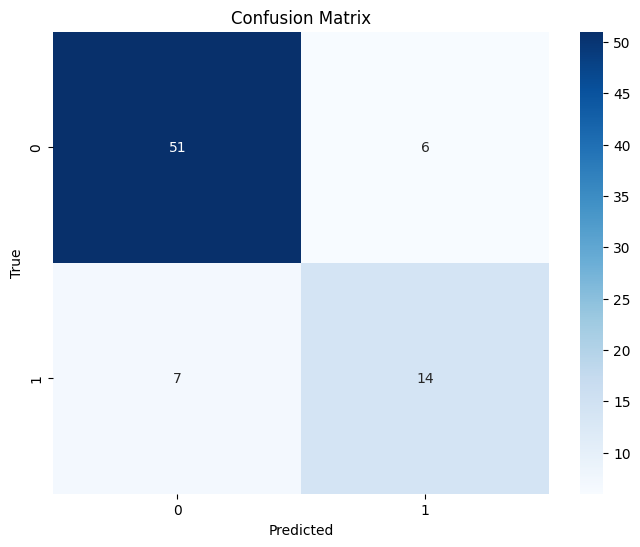

In [45]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=mlp.classes_,
            yticklabels=mlp.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Let's view a heatmap with the confusion matrix

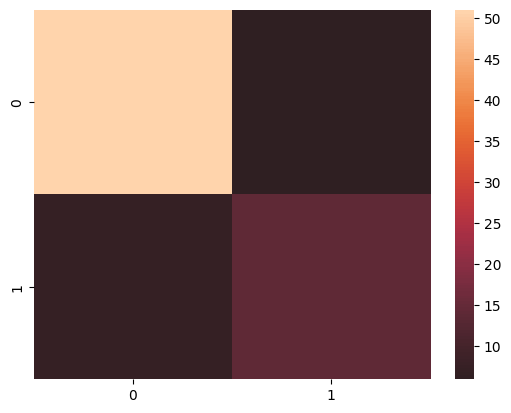

In [46]:
sns.heatmap(cm, center=True)
plt.show()

# Tensorflow

Now what about Tensorflow??

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

Set up a new sequential model, call it model_tf

Have 3 hidden layers, each with activation relu

have an output layer with only 1 unit, no activation function

Should you also set up a normaliser as well. See example workbooks

In [49]:
# Create a sequential model
model_tf = Sequential()


In [50]:
normalizer = Normalization(axis=-1)
normalizer.adapt(x_train_scaled)
model_tf.add(normalizer)

# Add 3 hidden layers with ReLU activation
model_tf.add(Dense(100, activation='relu'))
model_tf.add(Dense(100, activation='relu'))
model_tf.add(Dense(100, activation='relu'))

# Add output layer with 1 unit and no activation function
model_tf.add(Dense(1))

Compile the model, pick an optimizer, use Adam or tf.keras.optimizers.experimental.SGD(0.001). loss is binarycrossentropy

    metrics=['accuracy']

In [51]:

model_tf.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
y_train

Now try fitting, 20 epochs, do 

    X_train.values, y_train.values, epochs=20, validation_split=0.2

In [ ]:

model.tf.fit(X_train.values, y_train.values, epochs=20, validation_split=0.2)


 You should get a bunch of errors

### Why this error?

Well look at y_train

In [52]:
y_train

140    Abnormal
208    Abnormal
278      Normal
203    Abnormal
144    Abnormal
         ...   
188    Abnormal
71     Abnormal
106    Abnormal
270      Normal
102    Abnormal
Name: Class_att, Length: 232, dtype: object

They're not numbers, we need to convert those to numbers. Using LabelEncoder

Scikit-learn didn't care, but Tensorflow is a "lower-level" programming tool so you need to do the conversion yourself

In [ ]:
from sklearn import preprocessing

In [ ]:
# your code here



Fit the label encoder on y_train

Now transform both y_train and y_test

In [ ]:
y_train_enc = 
y_test_enc = 

In [ ]:
y_train_enc

## Fitting again

Try fitting your model again with y_train_enc. It should work now

In [53]:
# your code here

history = model_tf.fit(
    x_train_scaled, 
    y_train_encoded, 
    epochs=20, 
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6706 - loss: 0.6213 - val_accuracy: 0.6596 - val_loss: 0.5508
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6447 - loss: 0.5389 - val_accuracy: 0.6596 - val_loss: 0.4887
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6410 - loss: 0.5004 - val_accuracy: 0.6383 - val_loss: 0.4524
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6924 - loss: 0.4703 - val_accuracy: 0.7660 - val_loss: 0.4284
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7528 - loss: 0.4395 - val_accuracy: 0.7872 - val_loss: 0.4097
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7633 - loss: 0.3965 - val_accuracy: 0.8085 - val_loss: 0.3885
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7710 - loss: 0.3730 - val_accuracy: 0.8511 - val_loss: 0.3757
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8353 - loss: 0.3317 - val_accuracy: 0.8298 - val_loss: 0.3518


Accuracy for both the training and validation sets is a little all over the place. Maybe we need more Epochs or some other way to decide when to finish. Anyway...

In [55]:
y_pred = model_tf.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [56]:
np.set_printoptions(suppress=True)

In [57]:
y_pred

array([[  0.26905617],
       [-11.6907625 ],
       [  4.818646  ],
       [ -9.871871  ],
       [ -0.7155981 ],
       [ -3.1017466 ],
       [-11.137497  ],
       [ -6.334629  ],
       [ -1.4815261 ],
       [ -2.5957794 ],
       [-22.282946  ],
       [-15.82545   ],
       [  0.28736442],
       [  4.1401815 ],
       [  3.3138971 ],
       [ -1.7907276 ],
       [  2.9639604 ],
       [-15.117929  ],
       [  0.39783493],
       [-14.2309065 ],
       [ -7.6318197 ],
       [-15.241363  ],
       [ -9.2696295 ],
       [-15.133924  ],
       [-14.507538  ],
       [-16.469076  ],
       [-14.264701  ],
       [ -0.10222101],
       [  3.25389   ],
       [  5.289366  ],
       [ -6.5912933 ],
       [ -3.479781  ],
       [ -6.155311  ],
       [  2.6074715 ],
       [ -6.2131906 ],
       [ -6.8050084 ],
       [ -0.8867107 ],
       [  4.8654313 ],
       [-18.320265  ],
       [ -5.758114  ],
       [  0.2490499 ],
       [ -2.5238593 ],
       [-13.0816345 ],
       [  1

Those are not probabilities. Damn. Well we need to do some more

We could have set the activation to sigmoid on the last layer and that would've given us probabilities but tensorflow manual says not to do that

In [58]:
y_probs = tf.keras.activations.sigmoid(y_pred)

Let's convert those probabilities to 0s or 1s. This is not the best way of doing this, Tensorflow almost certainly has something better, but this is how I want to do it!

In [59]:
results = pd.DataFrame(y_probs, columns=["value"])

In [60]:
results["which"] = 0

In [61]:
results.loc[results['value'] >= 0.5, 'which'] = 1

In [62]:
results

,value,which
0,0.566861,1
1,0.000008,0
2,0.991987,1
3,0.000052,0
4,0.328363,0
...,...,...
73,0.016137,0
74,0.007952,0
75,0.875450,1
76,0.408686,0


In [63]:
results.which.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [65]:
y_test_encoded

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [67]:
mistakes = (results.which.values != y_test_encoded).sum()

In [68]:
model_tf.evaluate(x_test_scaled, y_test_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8037 - loss: 0.5539 


[0.5890264511108398, 0.7948718070983887]

In [69]:
1-mistakes/78

np.float64(0.8205128205128205)

Ok, it's worse than the sklearn implementation in test data but I haven't tried anything to tweak it, sklearn you will have noticed did more epochs in its training. It also didn't use any validation set.

## More Epochs! Lower learning rate

I'm going to take the same basic structure and see what happens when I make some changes

In [70]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

I'll also do a lower learning rate

In [71]:
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Lots and lots of epochs, let's run it and store the history

In [75]:
history = model_tf.fit(
    x_train_scaled,  # Remove .values - it's already a NumPy array
    y_train_encoded, 
    epochs=1000,  
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/1000


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6148 - loss: 0.6927 - val_accuracy: 0.6596 - val_loss: 0.6979
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6591 - loss: 0.6779 - val_accuracy: 0.6596 - val_loss: 0.6880
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6980 - loss: 0.6633 - val_accuracy: 0.6596 - val_loss: 0.6787
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6412 - loss: 0.6588 - val_accuracy: 0.6596 - val_loss: 0.6700
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6459 - loss: 0.6494 - val_accuracy: 0.6596 - val_loss: 0.6619
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6613 - loss: 0.6348 - val_accuracy: 0.6596 - val_loss: 0.6538
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7116 - loss: 0.6170 - val_accuracy: 0.6596 - val_loss: 0.6455
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6474 - loss: 0.6221 - val_accuracy: 0.6596 - val_loss: 0.63

In [76]:
model_tf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,805 (253.15 KB)

 Trainable params: 21,601 (84.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,204 (168.77 KB)

In [77]:
model_tf.evaluate(x_test_scaled, y_test_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8154 - loss: 0.3739 


[0.4006860554218292, 0.7948718070983887]

In [78]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

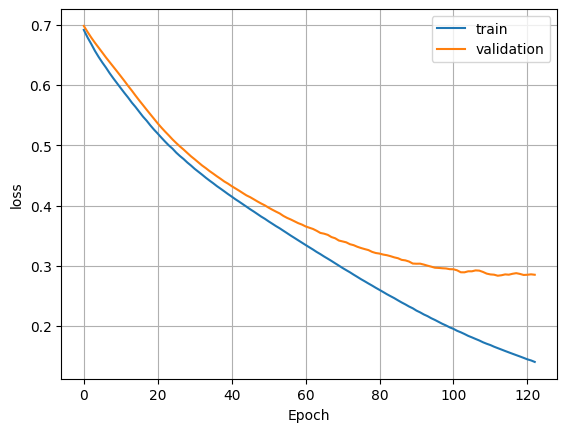

In [79]:
plot_loss(history)

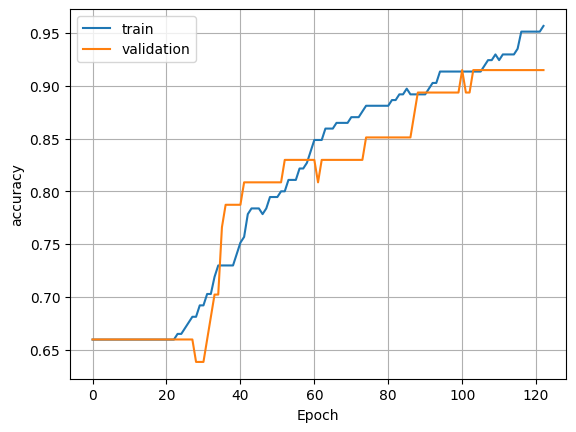

In [80]:
plot_loss(history, 'accuracy')

So probably shouldn't go for 1000 epochs, there's overfitting there

I'm going to implement Early Stopping. It's a form of regularisation - to try to prevent overfitting, and it also will train our model more quickly.

<a href="https://en.wikipedia.org/wiki/Early_stopping">Wikipedia Link</a>

<a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/">More Early Stopping Detail</a>

<a href="https://towardsdatascience.com/early-stopping-a-cool-strategy-to-regularize-neural-networks-bfdeca6d722e">Another Link</a>

I mentioned it in lectures without going into any detail and will talk about it more next week.

The basic idea is, monitor how well the validation set is performing after every epoch, if there has not been any improvement in its score for a while (say in 10 epochs or whatever you pick as your "patience" - we don't just say over 1 epoch as training could just be "stuck"). MLPClassifier in sklearn has it sort of implemented and we saw it  above "Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping."

It is added as a callback function that checks for what we want

In [81]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Be careful with restore_best_weights see https://medium.com/@doleron/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

In [ ]:
#callback_modelcheckpoint_loss = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_loss.keras', monitor='val_loss', save_best_only=True)

In [82]:
model_tf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

In [83]:
model_tf2.compile(
     optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [84]:
history = model_tf2.fit(
    x_train_scaled,  # Use the scaled features we created earlier (already a NumPy array)
    y_train_encoded,  # Use the encoded labels we created earlier
    epochs=1000,
    validation_split=0.2,
    callbacks=[callback]
)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6572 - loss: 0.7075 - val_accuracy: 0.7660 - val_loss: 0.5964
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7172 - loss: 0.6036 - val_accuracy: 0.7660 - val_loss: 0.4867
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8234 - loss: 0.4454 - val_accuracy: 0.8723 - val_loss: 0.4094
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7842 - loss: 0.4582 - val_accuracy: 0.8936 - val_loss: 0.3590
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8432 - loss: 0.4094 - val_accuracy: 0.8511 - val_loss: 0.3367
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8326 - loss: 0.3820 - val_accuracy: 0.8723 - val_loss: 0.3161
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8533 - loss: 0.3583 - val_accuracy: 0.8936 - val_loss: 0.3046
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8406 - loss: 0.3365 - val_accuracy: 0.8511 - v

I said go for 1000 epochs, but will only go for a certain amount due to early stopping

I also said to restore_best_weights, so it should be the model with the lowest val_loss that was found

In [87]:
model_tf2.evaluate(x_test_scaled, y_test_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8929 - loss: 0.2677 


[0.2931532561779022, 0.8717948794364929]

This may be worse than sklearn still

Anything you run may be different due to randomisation of batches etc

You can try adding regularisation. Using a different loss/optimizer and other things to improve your model. Also there is going to be some random chance.